# ORIE 5355/INFO 5370 HW 1: Survey Weighting

 - Name: Ruize Hou
 - Net-id: 5212520
 - Date: 09/14/2022
 - Late days used for this assignment: 1
 - Total late days used (counting this assignment): 1
 - People with whom you discussed this assignment: 

After you finish the homework, please complete the following (short, anonymous) post-homework survey: https://forms.gle/AM1x5qEnLCvxsgrJ7

We have marked questions in <font color='blue'> blue </font>. Please put answers in black (do not change colors). You'll want to write text answers in "markdown" mode instead of code. In Jupyter notebook, you can go to Cell > Cell Type > Markdown, from the menu. Please carefully read the late days policy and grading procedure [here](https://orie5355.github.io/Fall_2022/assignments/). In that link, we also give some tips on exporting your notebook to PDF, which is required for GradeScope submission. 

A few notes about this homework:
1. This homework is purposefully heavy in using the Pandas package. Being able to explore data is an essential data science skill that you'll use throughout this class and your career -- even if the polling/politics application is not interesting to you. I encourage you to practice Pandas and learn how to use it well. Your code will NOT be graded on efficiency.
2. Some of the questions can be interpreted in multiple ways. That is always true in data science. You'll need to make judgment calls for what analysis to do. For the homework, you'll still receive full points for any "reasonable" choice. Also feel free to ask questions on EdStem. 

# Conceptual component

### 1) Reading

<font color='blue'> Please read Sections 3 and 4 (pages 6-13) here: https://www.nber.org/system/files/working_papers/w20830/w20830.pdf, and answer the following questions.

<font color='blue'> Please summarize the sections in no more than two sentences. 

Ebay has three rating features of sellers that is visible for buyers, however these three features are biased. Some problems are only frequent users are likely to try low rating sellers, ratings are always high such that a 98% good rating doens't mean a good seller, and buyers with bad experiences are not willing to give ratings.

<font color='blue'> Do you think it's a problem that most ratings are positive? If so, why? Answer in no more than four sentences. Please incorporate concepts discussed in class in your answer. 

Yes. First, I think that some positive ratings are caused by "social desirability", as People tend to make others happy, so that their positive rating are sometime overrating their experience. Second, those ratings are not submitted by the true population, it is likely that people with good experience tend to rate the buyers but those with bad experience do not.

### 2) Personal reflection

<font color='blue'> Think back to a time that you trained a model on data from people or gathered opinions via a survey (an informal one is fine). If you have not done that before, you may answer these questions about an article in the news that reported on public opinions or a model that you think might be in deployment at a company or organization with which you interact (for example, Amazon, google maps, etc)

<font color='blue'> Briefly summarize the scenario in no more than two sentences. 

We analyze data for students from a rural area in China. We want to examine how do smoking behavior co-evolute with friendship network.

<font color='blue'> What was the construct that you cared about/wanted to measure? What was the measurement (numerical data)? In what ways did the measurement not match the construct you cared about? Answer in no more than 4 sentences.  

The survey is conducted monthly during a year to the same group of students. The major measurement we want to obtain is whether the student smoke (Yes:1, No:0), and whether the respondent is friend with each of the other respondents (Yes:1, No:0). The construct is a little too simple. For example, some respondent just try smoking for one time, so it is hard to categorize whether they smoke or not.

<font color='blue'> What selection biases/differential non-response issues occurred and how did it affect your measurement? (If your answer is "None," explain exactly why you believe the assumptions discussed in class were met). Answer in no more than 3 sentences. 

A major issue is that some students do not tell the truth. Since smoking is prohibited, students tend to say they don't smoke even if they do so. Also, people have different interpretation of the definition of friend, so there are many cases that A treats B as friends, but B doesn't think so. Morever, the survey is answered by only one class, this might cause selection bias.

<font color='blue'> Given what we have learned in class so far, what would you do differently if faced with the same scenario again? Answer in no more than 3 sentences. 

First, I will broaden my sample from a single class to the whole school to reduce selection bias. Since the population of a school is large, I will implement stratified sampling technique. Moreover, I might use other measurements for smoking behavior and friendship recognition to solve the problem that some students don't tell the truth. For example, get student A's friendship and smoking behavior from student B.

# Programming component

<font color='blue'> In this part of the homework, we provide you with data from a poll in Florida before the 2016 Presidential election in the United States. We also provide you with (one pollster's) estimates of who will vote in the 2016 election, made before the election. You will use this data and apply the weighting techniques covered in class.

## Preliminaries to load packages and data

In [3]:
import pandas as pd
import numpy as np

In [4]:
dfpoll = pd.read_csv('polling_data_hw1.csv') # raw polling data
dfpoll.head()

,candidate,age,gender,party,race,education
0,Someone else,30-44,Male,Independent,White,College
1,Hillary Clinton,45-64,Male,Republican,Hispanic,College
2,Hillary Clinton,30-44,Male,Independent,Hispanic,College
3,Hillary Clinton,65+,Female,Democrat,White,College
4,Donald Trump,65+,Female,Republican,White,High School


In [5]:
dfdemographic = pd.read_csv('florida_proportions_hw1.csv') # proportions of population
dfdemographic.head()

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2
0,0.387927,party,NaN,Democrat,NaN
1,0.398788,party,NaN,Republican,NaN
2,0.213285,party,NaN,Independent,NaN
3,0.445928,gender,NaN,Male,NaN
4,0.554072,gender,NaN,Female,NaN


In [6]:
dfdemographic.tail()

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2
112,0.034216,race,education,Hispanic,Some College
113,0.027588,race,education,Hispanic,College
114,0.010929,race,education,Other,High School
115,0.010570,race,education,Other,Some College
116,0.015142,race,education,Other,College


dfdemographic contains estimates of likely voters in Florida in 2016. When Demographic_Type_2 is NaN, the row refers to just the marginal population percentage of the group in Demographic_1 of type Demographic_Type_1. When it is not NaN, the row has the joint distribution of the corresponding demographic groups.

For example, row 0 means that 38.7927% of the electorate is from the Democrat party. Row 113 means that 2.7588% of the electorate is Hispanic AND graduated college. 

## Part A: Raw visualization

<font color='blue'> Here, we'll visualize whether the respondents in the poll match the likely voter estimates. Create a scatter-plot where each point represents one Demographic group (for example, party-Independent), where the X axis is the Electoral_Proportion in dfdemographic, and the Y axis is the proportion in dfpoll. 

In [7]:
new_dfdemographic = dfdemographic.copy(deep=True)

In [8]:
new_dfdemographic

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2
0,0.387927,party,NaN,Democrat,NaN
1,0.398788,party,NaN,Republican,NaN
2,0.213285,party,NaN,Independent,NaN
3,0.445928,gender,NaN,Male,NaN
4,0.554072,gender,NaN,Female,NaN
...,...,...,...,...,...
112,0.034216,race,education,Hispanic,Some College
113,0.027588,race,education,Hispanic,College
114,0.010929,race,education,Other,High School
115,0.010570,race,education,Other,Some College


In [9]:
proportion_lst = []
for i in range(len(new_dfdemographic)):
    if isinstance(new_dfdemographic["Demographic_Type_2"][i], float):
        proportion_lst.append(len(dfpoll[dfpoll[str(new_dfdemographic["Demographic_Type_1"][i])]==new_dfdemographic["Demographic_1"][i]])/len(dfpoll))
    else:
        proportion_lst.append(len(dfpoll[(dfpoll[str(new_dfdemographic["Demographic_Type_1"][i])]==new_dfdemographic["Demographic_1"][i]) & (dfpoll[str(new_dfdemographic["Demographic_Type_2"][i])]==new_dfdemographic["Demographic_2"][i])])/len(dfpoll))

In [10]:
new_dfdemographic["portion_dfpoll"] = proportion_lst

In [11]:
new_dfdemographic

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,portion_dfpoll
0,0.387927,party,NaN,Democrat,NaN,0.358708
1,0.398788,party,NaN,Republican,NaN,0.272203
2,0.213285,party,NaN,Independent,NaN,0.348328
3,0.445928,gender,NaN,Male,NaN,0.491349
4,0.554072,gender,NaN,Female,NaN,0.508651
...,...,...,...,...,...,...
112,0.034216,race,education,Hispanic,Some College,0.068051
113,0.027588,race,education,Hispanic,College,0.084198
114,0.010929,race,education,Other,High School,0.006920
115,0.010570,race,education,Other,Some College,0.014994


In [12]:
import matplotlib.pyplot as plt

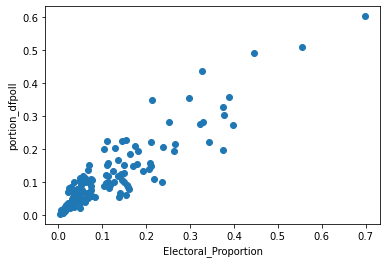

In [13]:
plt.scatter(new_dfdemographic["Electoral_Proportion"],new_dfdemographic["portion_dfpoll"])
plt.xlabel("Electoral_Proportion")
plt.ylabel("portion_dfpoll")
plt.show()

<font color='blue'>In your view, which group is most over-represented? Most under-represented? Why? Answer in no more than 3 sentences. There are multiple reasonable definitions of "over" or "under" represented; any choice is fine as long as you justify your answer.</font>

In [14]:
new_dfdemographic["Portion_Diff"] = new_dfdemographic["portion_dfpoll"] - new_dfdemographic["Electoral_Proportion"]
new_dfdemographic["Portion_Diff_rate"] = new_dfdemographic["Portion_Diff"]/new_dfdemographic["Electoral_Proportion"]

In [15]:
new_dfdemographic.sort_values(by="Portion_Diff_rate", ascending = False).head()

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,portion_dfpoll,Portion_Diff,Portion_Diff_rate
79,0.020696,age,race,18-29,Hispanic,0.070358,0.049661,2.399498
95,0.023934,age,education,18-29,College,0.080738,0.056804,2.373389
113,0.027588,race,education,Hispanic,College,0.084198,0.056610,2.051971
30,0.034919,party,age,Independent,18-29,0.098039,0.063121,1.807643
80,0.006011,age,race,18-29,Other,0.014994,0.008983,1.494425


In [16]:
new_dfdemographic.sort_values(by="Portion_Diff_rate", ascending = True).head()

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,portion_dfpoll,Portion_Diff,Portion_Diff_rate
102,0.153247,age,education,65+,High School,0.058824,-0.094423,-0.616152
49,0.137253,party,education,Republican,High School,0.055363,-0.081890,-0.596634
96,0.048088,age,education,30-44,High School,0.019608,-0.028480,-0.592253
105,0.235884,race,education,White,High School,0.100346,-0.135538,-0.574595
99,0.139230,age,education,45-64,High School,0.065744,-0.073486,-0.527804


Based on fraction analysis, the most over-represented group is Hispanic with age 18-29, because in the real poll, voters in this group votes 2.399 times more than the estimates of likely voters, which shows the highest difference. The most under-represenetd group is people age 65+ with High School education level, because the real voters are 0.61 times less than the estimates of likely voters, which shows the most negative difference by fraction.

## Part B: Weighting

<font color='blue'> For this question, we'll ignore people who answered anything but "Hillary Clinton" or "Donald Trump."


You'll notice that some of the groups in the polling data ("refused") do not show up in the population percentages. For the questions that require weighting by demographics, ignore those respondents.



### 1) Raw average

<font color='blue'> Below, report the "raw polling average," the percentage of people "Hillary Clinton" divided by the number who answered either Hillary or Trump.

In [129]:
only_hillary_trump = dfpoll[dfpoll.candidate.isin(["Hillary Clinton","Donald Trump"])]
only_hillary_trump

,candidate,age,gender,party,race,education
1,Hillary Clinton,45-64,Male,Republican,Hispanic,College
2,Hillary Clinton,30-44,Male,Independent,Hispanic,College
3,Hillary Clinton,65+,Female,Democrat,White,College
4,Donald Trump,65+,Female,Republican,White,High School
5,Hillary Clinton,18-29,Male,Independent,Black,Some College
...,...,...,...,...,...,...
861,Donald Trump,18-29,Male,Republican,Hispanic,High School
862,Hillary Clinton,65+,Male,Democrat,White,Some College
863,Donald Trump,65+,Male,Independent,White,College
864,Hillary Clinton,18-29,Female,Democrat,Other,College


In [130]:
print('Raw polling average is',len(only_hillary_trump[only_hillary_trump.candidate == "Hillary Clinton"])/len(only_hillary_trump))

Raw polling average is 0.5458333333333333


### 2) Single dimensional marginal weighting (on just 1 demographic type)

<font color='blue'> For each demographic type separately -- age, gender, party, race, and education -- weight the poll by just that demographic type, in accordance to the population proportions given. Report the resulting poll results, and briefly (at most 3 sentences) describe what you observe.


For example, when weighted by race, you'll report:

Weighted by race --- Clinton: 0.530, Trump: 0.470


In [19]:
# Weight by age
only_hillary_trump_age = only_hillary_trump[only_hillary_trump.age != "Refused"]
by_age = only_hillary_trump_age.groupby(["candidate","age"]).count()
age_count = only_hillary_trump_age.groupby(["age"])["candidate"].count().reset_index(name='counts_by_age')
age_count
by_age["candidate"] = ['Donald Trump']*len(age_count)+['Hillary Clinton']*len(age_count)

by_age_count = pd.merge(by_age,age_count, left_on='age', right_on='age', how='left')
by_age_count["portion"] = by_age_count["race"]/by_age_count["counts_by_age"]
by_age_count

true_age_portion = dfdemographic[(dfdemographic.Demographic_Type_1 == "age") & (dfdemographic.Demographic_Type_2.isnull())]
true_age_portion

by_age_count_final = pd.merge(by_age_count,true_age_portion, left_on='age', right_on='Demographic_1', how='left')
by_age_count_final

trump_age = by_age_count_final[by_age_count_final.candidate=="Donald Trump"]
hillary_age = by_age_count_final[by_age_count_final.candidate=="Hillary Clinton"]
print("Trump weight by age is:", sum(trump_age["portion"]*trump_age["Electoral_Proportion"]))
print("Hillary weight by age is:", sum(hillary_age["portion"]*hillary_age["Electoral_Proportion"]))

Trump weight by age is: 0.4694579870278752
Hillary weight by age is: 0.5305420129721238


In [20]:
# Weight by gender
only_hillary_trump_gender = only_hillary_trump[only_hillary_trump.gender != "Refused"]
by_gender = only_hillary_trump_gender.groupby(["candidate","gender"]).count()
gender_count = only_hillary_trump_gender.groupby(["gender"])["candidate"].count().reset_index(name='counts_by_gender')
gender_count
by_gender["candidate"] = ['Donald Trump']*len(gender_count)+['Hillary Clinton']*len(gender_count)

by_gender_count = pd.merge(by_gender,gender_count, left_on='gender', right_on='gender', how='left')
by_gender_count["portion"] = by_gender_count["race"]/by_gender_count["counts_by_gender"]
by_gender_count

true_gender_portion = dfdemographic[(dfdemographic.Demographic_Type_1 == "gender") & (dfdemographic.Demographic_Type_2.isnull())]
true_gender_portion

by_gender_count_final = pd.merge(by_gender_count,true_gender_portion, left_on='gender', right_on='Demographic_1', how='left')
by_gender_count_final

trump_gender = by_gender_count_final[by_gender_count_final.candidate=="Donald Trump"]
hillary_gender = by_gender_count_final[by_gender_count_final.candidate=="Hillary Clinton"]
print("Trump weight by gender is:", sum(trump_gender["portion"]*trump_gender["Electoral_Proportion"]))
print("Hillary weight by gender is:", sum(hillary_gender["portion"]*hillary_gender["Electoral_Proportion"]))

Trump weight by gender is: 0.45017664792495266
Hillary weight by gender is: 0.5498233520750473


In [21]:
# Weight by party
only_hillary_trump_party = only_hillary_trump[only_hillary_trump.party != "Refused"]
by_party = only_hillary_trump_party.groupby(["candidate","party"]).count()
party_count = only_hillary_trump_party.groupby(["party"])["candidate"].count().reset_index(name='counts_by_party')
party_count
by_party["candidate"] = ['Donald Trump']*len(party_count)+['Hillary Clinton']*len(party_count)

by_party_count = pd.merge(by_party,party_count, left_on='party', right_on='party', how='left')
by_party_count["portion"] = by_party_count["race"]/by_party_count["counts_by_party"]
by_party_count

true_party_portion = dfdemographic[(dfdemographic.Demographic_Type_1 == "party") & (dfdemographic.Demographic_Type_2.isnull())]
true_party_portion

by_party_count_final = pd.merge(by_party_count,true_party_portion, left_on='party', right_on='Demographic_1', how='left')
by_party_count_final

trump_party = by_party_count_final[by_party_count_final.candidate=="Donald Trump"]
hillary_party = by_party_count_final[by_party_count_final.candidate=="Hillary Clinton"]
print("Trump weight by party is:", sum(trump_party["portion"]*trump_party["Electoral_Proportion"]))
print("Hillary weight by party is:", sum(hillary_party["portion"]*hillary_party["Electoral_Proportion"]))

Trump weight by party is: 0.5012804969562159
Hillary weight by party is: 0.4987195030437841


In [22]:
# Weight by race
only_hillary_trump_race = only_hillary_trump[only_hillary_trump.race != "Refused"]
by_race = only_hillary_trump_race.groupby(["candidate","race"]).count()
race_count = only_hillary_trump_race.groupby(["race"])["candidate"].count().reset_index(name='counts_by_race')
race_count
by_race["candidate"] = ['Donald Trump']*len(race_count)+['Hillary Clinton']*len(race_count)

by_race_count = pd.merge(by_race,race_count, left_on='race', right_on='race', how='left')
by_race_count["portion"] = by_race_count["age"]/by_race_count["counts_by_race"]
by_race_count

true_race_portion = dfdemographic[(dfdemographic.Demographic_Type_1 == "race") & (dfdemographic.Demographic_Type_2.isnull())]
true_race_portion

by_race_count_final = pd.merge(by_race_count,true_race_portion, left_on='race', right_on='Demographic_1', how='left')
by_race_count_final

trump_race = by_race_count_final[by_race_count_final.candidate=="Donald Trump"]
hillary_race = by_race_count_final[by_race_count_final.candidate=="Hillary Clinton"]
print("Trump weight by race is:", sum(trump_race["portion"]*trump_race["Electoral_Proportion"]))
print("Hillary weight by race is:", sum(hillary_race["portion"]*hillary_race["Electoral_Proportion"]))

Trump weight by race is: 0.4695140471484364
Hillary weight by race is: 0.5304859528515626


In [23]:
# Weight by education
only_hillary_trump_education = only_hillary_trump[only_hillary_trump.education != "Refused"]
by_education = only_hillary_trump_education.groupby(["candidate","education"]).count()
education_count = only_hillary_trump_education.groupby(["education"])["candidate"].count().reset_index(name='counts_by_education')
education_count
by_education["candidate"] = ['Donald Trump']*len(education_count)+['Hillary Clinton']*len(education_count)

by_education_count = pd.merge(by_education,education_count, left_on='education', right_on='education', how='left')
by_education_count["portion"] = by_education_count["age"]/by_education_count["counts_by_education"]
by_education_count

true_education_portion = dfdemographic[(dfdemographic.Demographic_Type_1 == "education") & (dfdemographic.Demographic_Type_2.isnull())]
true_education_portion

by_education_count_final = pd.merge(by_education_count,true_education_portion, left_on='education', right_on='Demographic_1', how='left')
by_education_count_final

trump_education = by_education_count_final[by_education_count_final.candidate=="Donald Trump"]
hillary_education = by_education_count_final[by_education_count_final.candidate=="Hillary Clinton"]
print("Trump weight by education is:", sum(trump_education["portion"]*trump_education["Electoral_Proportion"]))
print("Hillary weight by education is:", sum(hillary_education["portion"]*hillary_education["Electoral_Proportion"]))

Trump weight by education is: 0.4559412977166821
Hillary weight by education is: 0.5440587022833179


### 2-dimensional joint distribution weighting

<font color='blue'>Now, for each pair of demographic types in dfdemographic, do the same -- weight the poll by that pair of demographic types, in accordance to the given joint distributions, and briefly (at most 3 sentences) describe what you observe.

For example, when weighted by race and age, you'll find:

Weighted by age and race: Clinton: 0.525, Trump: 0.475

In [144]:
only_hillary_trump
type1 = "race"
type2 = "age"
only_hillary_trump.groupby(["candidate",type1,type2]).count()

gender  party  education
candidate       race     age                            
Donald Trump    Black    18-29       2      2          2
                         45-64       2      2          2
                         65+         1      1          1
                Hispanic 18-29       9      9          9
                         30-44       7      7          7
                         45-64      11     11         11
                         65+         6      6          6
                Other    18-29       2      2          2
                         30-44       3      3          3
                         45-64       3      3          3
                         65+         2      2          2
                Refused  30-44       4      4          4
                         45-64       6      6          6
                White    18-29      34     34         34
                         30-44      37     37         37
                         45-64      94     94         94
                         65+       104    104        104
Hillary Clinton Black    18-29      22     22         22
                         30-44      13     13         13
                         45-64      26     26         26
                         65+        16     16         16
                Hispanic 18-29      35     35         35
                         30-44      27     27         27
                         45-64      28     28         28
                         65+        20     20         20
                Other    18-29       8      8          8
                         30-44       5      5          5
                         45-64       5      5          5
                         65+         2      2          2
                Refused  30-44       3      3          3
                         45-64       2      2          2
                         65+         2      2          2
                White    18-29      32     32         32
                         30-44      26     26         26
                         45-64      55     55         55
                         65+        66     66         66

In [81]:
# Problem arised since there are missing pairs 
# So let us use loops to solve the problem
# First let us define a function that take the pair of demographic types as arguments which returns weighted vote
def getJointWeighting(type1, type2):
    type1_lst = dfdemographic[dfdemographic['Demographic_Type_1']==type1]['Demographic_1'].unique()
    type2_lst = dfdemographic[dfdemographic['Demographic_Type_1']==type2]['Demographic_1'].unique()
    
    trump_lst = []
    hillary_lst = []
    frac_trump_lst = []
    frac_hillary_lst = []
    E_proportion = []
    group = []
    real_frac_trump = []
    real_frac_hillary = []
        
    df = only_hillary_trump[(only_hillary_trump[type1] != 'refused') & (only_hillary_trump[type2] != 'refused')]
    for m in type1_lst:
        for n in type2_lst:
            count_trump = len(df[(df['candidate'] == 'Donald Trump') & (df[type1] == m) & (df[type2] == n)])
            count_hillary = len(df[(df['candidate'] == 'Hillary Clinton') & (df[type1] == m) & (df[type2] == n)])
            total = count_trump + count_hillary
            frac_trump = count_trump/total
            frac_hillary = count_hillary/total
            e_prop = float(dfdemographic['Electoral_Proportion'][(dfdemographic['Demographic_1'] == m) & (dfdemographic['Demographic_2'] == n)])
            trump_lst.append(count_trump)
            hillary_lst.append(count_hillary)
            frac_trump_lst.append(frac_trump)
            frac_hillary_lst.append(frac_hillary)
            
            E_proportion.append(e_prop)
            group.append([m,n])
            real_frac_trump.append(frac_trump*e_prop)
            real_frac_hillary.append(frac_hillary*e_prop)
    trump_weighted = 0
    hillary_weighted = 0 
    
    
    return [sum(real_frac_trump),sum(real_frac_hillary)]

In [100]:
# get weighted by age and race
type1 = 'age'
type2 = 'race'
vote = getJointWeighting(type1, type2)
print("Weighted by age and race: Clinton: {}, Trump: {}".format(vote[1], vote[0]))
#dfdemographic['Electoral_Proportion'][(dfdemographic['Demographic_1'] == 'Hispanic') & (dfdemographic['Demographic_2'] == '45-64')]

Weighted by age and race: Clinton: 0.5245159272021906, Trump: 0.47548407279780935


In [99]:
# get weighted by party and gender
type1 = 'party'
type2 = 'gender'
vote = getJointWeighting(type1, type2)
print("Weighted by party and gender: Clinton: {}, Trump: {}".format(vote[1], vote[0]))

Weighted by age and race: Clinton: 0.5029213060686997, Trump: 0.4970786939312994


In [98]:
# get weighted by party and age
type1 = 'party'
type2 = 'age'
vote = getJointWeighting(type1, type2)
print("Weighted by party and age: Clinton: {}, Trump: {}".format(vote[1], vote[0]))

Weighted by age and race: Clinton: 0.4979923466251236, Trump: 0.5020076533748767


In [101]:
# get weighted by party and race
type1 = 'party'
type2 = 'race'
vote = getJointWeighting(type1, type2)
print("Weighted by party and race: Clinton: {}, Trump: {}".format(vote[1], vote[0]))

Weighted by party and race: Clinton: 0.5011444670666649, Trump: 0.4988555329333347


In [103]:
# get weighted by party and education
type1 = 'party'
type2 = 'education'
vote = getJointWeighting(type1, type2)
print("Weighted by party and education: Clinton: {}, Trump: {}".format(vote[1], vote[0]))

Weighted by party and education: Clinton: 0.4935008813708104, Trump: 0.5064991186291888


In [102]:
# get weighted by gender and age
type1 = 'gender'
type2 = 'age'
vote = getJointWeighting(type1, type2)
print("Weighted by gender and age: Clinton: {}, Trump: {}".format(vote[1], vote[0]))

Weighted by gender and age: Clinton: 0.5332889700974133, Trump: 0.46671102990258795


In [104]:
# get weighted by gender and race
type1 = 'gender'
type2 = 'race'
vote = getJointWeighting(type1, type2)
print("Weighted by gender and race: Clinton: {}, Trump: {}".format(vote[1], vote[0]))

Weighted by gender and race: Clinton: 0.5348155487959094, Trump: 0.4651844512040904


In [105]:
# get weighted by gender and education
type1 = 'gender'
type2 = 'education'
vote = getJointWeighting(type1, type2)
print("Weighted by gender and education: Clinton: {}, Trump: {}".format(vote[1], vote[0]))

Weighted by gender and education: Clinton: 0.5475782479595503, Trump: 0.45242175204044976


In [106]:
# get weighted by age and race
type1 = 'age'
type2 = 'race'
vote = getJointWeighting(type1, type2)
print("Weighted by age and race: Clinton: {}, Trump: {}".format(vote[1], vote[0]))

Weighted by age and race: Clinton: 0.5245159272021906, Trump: 0.47548407279780935


In [107]:
# get weighted by age and education
type1 = 'age'
type2 = 'education'
vote = getJointWeighting(type1, type2)
print("Weighted by age and education: Clinton: {}, Trump: {}".format(vote[1], vote[0]))

Weighted by age and education: Clinton: 0.5254829927664427, Trump: 0.47451700723355683


In [108]:
# get weighted by race and education
type1 = 'race'
type2 = 'education'
vote = getJointWeighting(type1, type2)
print("Weighted by race and education: Clinton: {}, Trump: {}".format(vote[1], vote[0]))

Weighted by race and education: Clinton: 0.5142722847612909, Trump: 0.4857277152387097


In [90]:
with pd.option_context('display.max_rows', None,):
   print(dfdemographic[['Demographic_1','Demographic_2']])

    Demographic_1 Demographic_2
0        Democrat           NaN
1      Republican           NaN
2     Independent           NaN
3            Male           NaN
4          Female           NaN
5           18-29           NaN
6           30-44           NaN
7           45-64           NaN
8             65+           NaN
9           White           NaN
10          Black           NaN
11       Hispanic           NaN
12          Other           NaN
13    High School           NaN
14   Some College           NaN
15        College           NaN
16       Democrat          Male
17       Democrat        Female
18     Republican          Male
19     Republican        Female
20    Independent          Male
21    Independent        Female
22       Democrat         18-29
23       Democrat         30-44
24       Democrat         45-64
25       Democrat           65+
26     Republican         18-29
27     Republican         30-44
28     Republican         45-64
29     Republican           65+
30    In

In [26]:
dfdemographic[dfdemographic['Demographic_Type_1']=='party']['Demographic_1'].unique()

array(['Democrat', 'Republican', 'Independent'], dtype=object)

In [27]:
only_hillary_trump.head()

,candidate,age,gender,party,race,education
1,Hillary Clinton,45-64,Male,Republican,Hispanic,College
2,Hillary Clinton,30-44,Male,Independent,Hispanic,College
3,Hillary Clinton,65+,Female,Democrat,White,College
4,Donald Trump,65+,Female,Republican,White,High School
5,Hillary Clinton,18-29,Male,Independent,Black,Some College


In [28]:
type1 = 'race'
type2 = 'education'
m = 'Hispanic'
n = 'College'
only_hillary_trump[(only_hillary_trump[type1] == m) & (only_hillary_trump[type2] == n)]

,candidate,age,gender,party,race,education
1,Hillary Clinton,45-64,Male,Republican,Hispanic,College
2,Hillary Clinton,30-44,Male,Independent,Hispanic,College
14,Hillary Clinton,30-44,Male,Independent,Hispanic,College
39,Hillary Clinton,18-29,Male,Democrat,Hispanic,College
96,Hillary Clinton,30-44,Male,Democrat,Hispanic,College
97,Hillary Clinton,65+,Male,Democrat,Hispanic,College
99,Hillary Clinton,65+,Male,Democrat,Hispanic,College
118,Donald Trump,18-29,Female,Republican,Hispanic,College
221,Hillary Clinton,45-64,Male,Democrat,Hispanic,College
226,Hillary Clinton,30-44,Female,Democrat,Hispanic,College


We can see that the weighted vote varied by the group we selected. Trump reaches the highest proportion of vote when we weight by "party and age" and "party and education", even bigger than 0.5 which means winning the election. Hillary gets the highest portion when we weight by "gender and education". Trump gets high proportion when weighted by party and others, and Hillary gets high proportion when weighted by gender and others.

### 3) 2-dimensional marginal 

<font color='blue'>We don't always have access to joint distributions across the population -- for example, it may be hard to estimate from past exit polls (surveys done as people are leaving the polling station) what the joint distribution of education and gender is, for example. However, access to marginal distributions are often available. 

As discussed in class, one strategy when you don't have access to joint distributions -- only marginals -- is to _multiply_ the marginal distributions. For example, if 50% of your population is Democratic and 50% is a woman, then pretend that 50% times 50% = 25% of your population is a Democratic women. Clearly this technique is not perfect, but it is sometimes a useful heuristic.   

For the following pairs of Demographic types, report the weighting results if you use the joint distributions in dfdemographic versus if you approximate the joint distribution using the marginals. Briefly (at most 3 sentences) describe what you observe.

(party, gender)

(race, gender)

As an example output, here's the results for two other pairs of demographics:

|    | Demo1   | Demo2     |    Joint |
|---:|:--------|:----------|---------:|
|  0 | age     | race      | 0.524516 |
|  1 | age     | education | 0.525483 |

In [115]:
# First let us define a function that take the pair of demographic types as arguments which returns weighted vote
def getJointWeightingMargin(type1, type2):
    type1_lst = dfdemographic[dfdemographic['Demographic_Type_1']==type1]['Demographic_1'].unique()
    type2_lst = dfdemographic[dfdemographic['Demographic_Type_1']==type2]['Demographic_1'].unique()
    
    trump_lst = []
    hillary_lst = []
    frac_trump_lst = []
    frac_hillary_lst = []
    E_proportion = []
    group = []
    real_frac_trump = []
    real_frac_hillary = []
        
    df = only_hillary_trump[(only_hillary_trump[type1] != 'refused') & (only_hillary_trump[type2] != 'refused')]
    for m in type1_lst:
        for n in type2_lst:
            count_trump = len(df[(df['candidate'] == 'Donald Trump') & (df[type1] == m) & (df[type2] == n)])
            count_hillary = len(df[(df['candidate'] == 'Hillary Clinton') & (df[type1] == m) & (df[type2] == n)])
            total = count_trump + count_hillary
            frac_trump = count_trump/total
            frac_hillary = count_hillary/total
            e_prop1 = len(df[(df[type1]==m)])/len(df) * len(df[(df[type1]==n)])/len(df)
            e_prop2 = float(dfdemographic['Electoral_Proportion'][(dfdemographic['Demographic_1'] == m) & dfdemographic['Demographic_2'].isna()])
            e_prop3 = float(dfdemographic['Electoral_Proportion'][(dfdemographic['Demographic_1'] == n) & dfdemographic['Demographic_2'].isna()])
            e_prop = e_prop2*e_prop3
            trump_lst.append(count_trump)
            hillary_lst.append(count_hillary)
            frac_trump_lst.append(frac_trump)
            frac_hillary_lst.append(frac_hillary)
            
            E_proportion.append(e_prop)
            group.append([m,n])
            real_frac_trump.append(frac_trump*e_prop)
            real_frac_hillary.append(frac_hillary*e_prop)
    trump_weighted = 0
    hillary_weighted = 0 
    
    
    return [sum(real_frac_trump),sum(real_frac_hillary)]

In [116]:
# get weighted by party and gender
type1 = 'party'
type2 = 'gender'
vote1 = getJointWeighting(type1, type2)
vote2 = getJointWeightingMargin(type1, type2)
print("Weighted by party and gender: Clinton: {}, Trump: {}".format(vote[1], vote[0]))
print("Weighted by party and gender using margin: Clinton: {}, Trump: {}".format(vote1[1], vote1[0]))

Weighted by age and education: Clinton: 0.5142722847612909, Trump: 0.4857277152387097
Weighted by age and education using margin: Clinton: 0.5029213060686997, Trump: 0.4970786939312994


In [118]:
# get weighted by race and gender
type1 = 'gender'
type2 = 'race'
vote1 = getJointWeighting(type1, type2)
vote2 = getJointWeightingMargin(type1, type2)
print("Weighted by race and gender: Clinton: {}, Trump: {}".format(vote[1], vote[0]))
print("Weighted by race and gender using margin: Clinton: {}, Trump: {}".format(vote1[1], vote1[0]))

Weighted by race and gender: Clinton: 0.5142722847612909, Trump: 0.4857277152387097
Weighted by race and gender using margin: Clinton: 0.5348155487959094, Trump: 0.4651844512040904


We can see that by using margin, our weighted vote result is different from using the joint distributions in dfdemographic. By using margin, trump received a higher vote proportion weighted by party and gender, and Hillary received a higher vote proportion weighted by race and gender.

### 4) Bonus points (up to 3 points): Implement a "cheap" version of the MRP technique mentioned in class.

<font color='blue'> The above techniques use the mean answer among people who share a demographic as the estimate for that demographic. But that wastes information _across_ demographics. For example, maybe people who only have "Some College" are similar enough to people who have "High School" as to provide some useful information. 

First, do the following: use a logistic regression (or your favorite prediction tool) to predict candidate choice, using the demographics. You might want to convert some demographics (like education) to ordered numeric (e.g., 1, 2, 3) as opposed to using discrete categories. 

Here, you will earn partial bonus points by just reporting the predictions and comparing them to the means of each covariate group in the raw polling data. Give a scatter-plot, where each point is one combination of full demographics (age, gender, party, race/ethnicity, education), the X axis is the raw polling average for that combination, and the Y axis is your regression prediction for that combination.   

Then, once you have predictions for each set of covariates, "post-stratify" to get a single population estimate by plugging them into the above weighting techniques, where you use the predictions instead of the raw averages in that cell. Report the resulting estimates if you do the 2-dimensional joint weighting (on every pair).

### 5) Bonus points (up to 2 points): Implement full "raking" using all the demographic covariates, i.e., match all the marginals without assuming independence, as opposed to just one or two marginal distributions.

<font color='blue'> You may use existing python packages, such as [here](https://github.com/Quantipy/quantipy3). Another approach would be to use [rpy2](https://rpy2.github.io/doc/latest/html/introduction.html) to call `R`, as there are many well-maintained packages in `R` to analyze polling data. One example is [here](https://www.rdocumentation.org/packages/survey/versions/4.1-1/topics/rake). 

## Part C: Uncertainty analysis, choices, and discussion

### 1) Education weighting analysis and "refused" answers

<font color='blue'> i. In Part B, you should notice a discrepancy from what we said in class and the data -- weighting by education does _not_ seem to help much in reducing the polling average from being pro-Clinton.

Here, we'll try to dig into the data to see why the methods we tried above might not be perfect, and what data you would want (such as demographic joint distribution) to do better. 

First, aggregate (using the groupby function) the poll results by education. Second, aggregate by education and some of the other covariates (for example, education and race, or education and party). Discuss in 4 sentences or less.

In [124]:
dfpoll.groupby('education').count()['candidate']

education
College         378
High School     171
Refused          12
Some College    306
Name: candidate, dtype: int64

In [125]:
dfpoll.groupby(['education', 'race']).count()['candidate']

education     race    
College       Black        33
              Hispanic     73
              Other        20
              Refused       9
              White       243
High School   Black        33
              Hispanic     43
              Other         6
              Refused       2
              White        87
Refused       Black         2
              Hispanic      1
              Refused       8
              White         1
Some College  Black        34
              Hispanic     59
              Other        13
              Refused       9
              White       191
Name: candidate, dtype: int64

In [126]:
dfpoll.groupby(['education','party']).count()['candidate']

education     party      
College       Democrat       135
              Independent    132
              Refused          4
              Republican     107
High School   Democrat        69
              Independent     49
              Refused          5
              Republican      48
Refused       Democrat         4
              Independent      3
              Refused          3
              Republican       2
Some College  Democrat       103
              Independent    118
              Refused          6
              Republican      79
Name: candidate, dtype: int64

By looking at the poll date grouped by education level, we can see that the poll is participated by mostly high education level group. People with college level and some college level are the majority of the population. Moreover, Democrat oocupied a larger portion of the voting population compared to republican.

<font color='blue'> ii. You'll notice that there are some responses with "refused," and that those people in particular are Trump-leaning. Furthermore, there are likely many people who refused to answer the poll at all, who do not show up in the data. The weighting techniques we used above would ignore these people. How would you adjust your procedures/estimates above to take them into account? Answer in at most 3 sentences.

First I will estimate the portion of 'refused' voters who supports Trump by analyzing the poll data. Then I will analyze what education level tend to support trump, and assign those refused voters to that education level.

<font color='blue'> None of the above techniques deal with selection biases/non-response on _un-measured_ covariates. Do you think that may be an important concern in this dataset? Why or why not? Respond in 3 or fewer sentences.

Yes, it is a important concern. Because we can see that the majority of poll population is consist of high education group (with college level or some college level education), and democrats. It is highly likely that this sample does not represent the true population, and thus the opinion generated by this sample is biased.

### 2) Final estimates

<font color='blue'> Throughout this homework, you made many estimates of the same quantity -- the fraction of people who will vote for Clinton in Florida. Below, plot a histogram of all your estimates.

In [131]:
all_estimates = [0.5458333333333333,0.5305420129721238,0.5498233520750473,0.4987195030437841,0.5304859528515626,0.5440587022833179,0.5245159272021906,0.5029213060686997,0.4979923466251236,0.5011444670666649,0.4935008813708104,0.5332889700974133,0.5348155487959094,0.5475782479595503,0.5245159272021906,0.5254829927664427,0.5142722847612909,0.5029213060686997,0.5348155487959094] 

<font color='blue'> Given all your above analysis, if you were a pollster what would you report as your single estimate? 

In [136]:
# Use mean to give single estimate
mean = np.mean(all_estimates)
print('Single estimate is',mean)

Single estimate is 0.523012032175793


<font color='blue'> Justify your choice, in at most 3 sentences

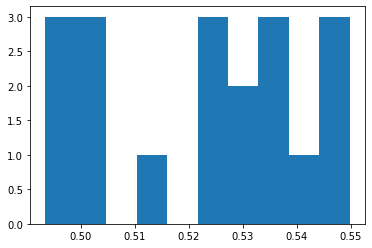

In [142]:
plt.hist(all_estimates)
plt.show()

In [143]:
len(all_estimates)

19

We can see that some of our estimates lie around 0.5, and some of our estimates lie around 0.535. This polarization is caused by the weighting. So we can use mean value for estimation to get the middle point of the polarization. Also, by law of large number, mean is likely to be the best estimators. We have 19 numbers, which is acceptable even not reach the common threshold of 30.

<font color='blue'> Though we did not discuss how to calculate margin of error or standard errors with weighting in this course, what would you say if someone asked you how confident you are in your estimate? You may either qualitatively answer, or try to come up with a margin of error.  

In [140]:
# Assume normal distribution
z_score = 1.96
stdev = np.std(all_estimates)

In [141]:
margin_of_error = [mean-z_score*stdev, mean+z_score*stdev]
print("Margin of error is", margin_of_error)

Margin of error is [0.4874852067546097, 0.5585388575969762]
